Import Libraries

In [46]:
from sklearn import datasets
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
# Importing modules that are required

from sklearn.datasets import load_boston
from sklearn.linear_model import LassoLars
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model


# Diabetes dataset

In [47]:
data = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

In [48]:
#Data needs to be standardized
lm_model = linear_model.Lars(normalize= False)

In [49]:
#Converting Bunch type to array
mod_data = np.c_[data.data, data.target]
columns1 = np.append(data.feature_names, ["target"])

### Standardization

In [50]:
#To Standardize
from sklearn import preprocessing
import numpy as np
import pandas as pd
scaler = preprocessing.StandardScaler()

In [51]:
mod_data_df = pd.DataFrame(mod_data, columns=columns1)

In [52]:
std_data_df_fit = scaler.fit(mod_data_df)
std_data_df = scaler.transform(mod_data_df)
std_data_df = pd.DataFrame(std_data_df, columns = columns1)

In [53]:
std_data_df.loc[:, std_data_df.columns != 'target']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256044,-0.119769,-0.053957,-0.602843,-0.054499,0.655795,0.151508
438,-0.115937,1.065488,-0.334410,-1.422098,1.037341,1.664355,-0.602843,0.721302,-0.380915,0.935254
439,0.876870,1.065488,-0.334410,0.363330,-0.785107,-0.290965,-0.525441,-0.232934,-0.985585,0.325674
440,-0.956004,-0.938537,0.821235,0.025547,0.343075,0.321306,-0.602843,0.558384,0.936155,-0.545154


## Model fit

In [54]:
x_train, x_test, y_train, y_test = train_test_split(std_data_df.loc[:, std_data_df.columns != 'target'], std_data_df.target)

In [55]:
lm_model.fit(x_train, y_train)

Lars(normalize=False)

In [56]:
y_pred =  lm_model.predict(x_test)

In [57]:
mse = skl.metrics.mean_squared_error(y_test, y_pred)
print("Mean squared", mse)

Mean squared 0.6179965831377815


In [58]:
model_coeff_path = lm_model.coef_path_
pd.DataFrame(model_coeff_path)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020
1,0.0,0.000000,0.000000,0.000000,0.000000,-0.034572,-0.042478,-0.106496,-0.129925,-0.140988,-0.146647,-0.147195
2,0.0,0.059492,0.234805,0.281065,0.323707,0.325777,0.327310,0.335788,0.338002,0.331756,0.328705,0.328411
3,0.0,0.000000,0.000000,0.050390,0.120319,0.142115,0.147810,0.187049,0.203904,0.209579,0.213031,0.213360
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.009948,-0.094170,-0.174850,-0.555735,-0.837589,-0.864756
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.309937,0.531309,0.552642
6,0.0,0.000000,0.000000,0.000000,-0.063877,-0.086915,-0.089139,-0.103410,-0.039462,0.115687,0.244109,0.256486
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095014,0.131083,0.173256,0.177323
8,0.0,0.000000,0.187822,0.239126,0.290662,0.296624,0.303777,0.355372,0.369998,0.513410,0.616863,0.626832
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030355,0.037789,0.035757,0.034043,0.033874


Text(0.5, 1.0, 'LARS')

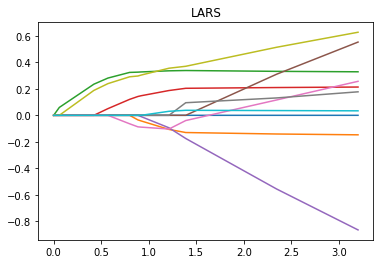

In [59]:
coeff_sum = np.sum(abs(model_coeff_path), axis=0)
coeff_sum.shape
plt.plot(coeff_sum, model_coeff_path.T)
plt.title("LARS")

# Boston dataset

In [60]:
# Loading dataset
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#dataset = load_boston()
X = data
y = target

# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y,
					test_size = 0.15, random_state = 42)

### LARS

In [ ]:
lars_cv_model = skl.linear_model.LarsCV()
lars_cv_model.fit(x_train, y_train)
lars_cv_model.alpha_
print(f"alpha/ lambda value : {lars_cv_model.alpha_}")

In [ ]:
# lars model
lars_model = skl.linear_model.Lars(normalize= False)
lars_model.fit(X_train, y_train)
model_coeff_path = lars_model.coef_path_
coeff_sum = np.sum(abs(model_coeff_path), axis=0)
prediction = lars_model.predict(X_test)
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")
plt.plot(coeff_sum, model_coeff_path.T)
plt.title("lars")

In [ ]:
#Lasso lars model
regressor = LassoLars(alpha = 0.1)
regressor.fit(X_train, y_train)
model_coeff_path = regressor.coef_path_
coeff_sum = np.sum(abs(model_coeff_path), axis=0)
prediction = regressor.predict(X_test)
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")
plt.plot(coeff_sum, model_coeff_path.T)
plt.title("lasso lars")

In [ ]:
# # lars model
# lars_model = skl.linear_model.Lasso(normalize= False)
# lars_model.fit(X_train, y_train)
# model_coeff_path = lars_model
# coeff_sum = np.sum(abs(model_coeff_path), axis=0)
# prediction = lars_model.predict(X_test)
# print(f"r2 Score of test set : {r2_score(y_test, prediction)}")
# plt.plot(coeff_sum, model_coeff_path.T)
# plt.title("lars")

# Synthetic dataset

In [62]:
import numpy as np
import pandas as pd

In [63]:
np.random.seed(19873)
#generate correlated data

n = 1000
p = 500
mat1 = np.random.normal(0,1,size=(n,p))

In [64]:
mat1.shape

(1000, 500)

In [65]:
dfPredictors = pd.DataFrame(mat1)

In [66]:
#mat1[:,1:2]
#iris.iloc[:,0:4].apply(ratio_to_max, axis=0)
yOutput = 10 * (dfPredictors.iloc[:,0:1].apply(sum, axis= 1) ) + 5 * ( dfPredictors.iloc[:,2:3].apply(sum, axis= 1)) + ( dfPredictors.iloc[:,4:13].apply(sum, axis= 1)) + np.random.normal(0,1,size=(n))

In [67]:
# x = matrix(rnorm(n*p), nrow=n, ncol=p)
# y = 10*apply(x[,1:2],1,sum)+5*apply(x[,3:4],1,sum)+apply(x[,5:14],1,sum)+rnorm(n)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(dfPredictors, yOutput, test_size=0.33)


R2 score -> 

The Determination Coefficient (𝑅2) measures how far the model's ability to explain
variations in non-independent variables 

The value of the determination coefficient ranges between 0 and 1. Value coefficient of
determination close to one means that the independent variables provide almost all the
information needed to predict variations in non-independent variables

## LARS

In [69]:
#@title
import warnings
warnings.filterwarnings('ignore')

In [70]:
lars_cv_model = skl.linear_model.LarsCV()
lars_cv_model.fit(x_train, y_train)
lars_cv_model.alpha_
print(f"alpha/ lambda value : {lars_cv_model.alpha_}")

alpha/ lambda value : 0.002891488621307924


In [71]:
print(len(lars_cv_model.coef_))
filter_arr = lars_cv_model.coef_>0
newarr = lars_cv_model.coef_[filter_arr]
print(f"no. of non-zero coeffs : {len(newarr)}")

500
no. of non-zero coeffs : 22


In [87]:
lars_cv_model.alphas_

array([0.40076812, 0.20169687, 0.04682834, 0.04361899, 0.04090447,
       0.03848528, 0.03724219, 0.03496703, 0.03361783, 0.03155117,
       0.02966238, 0.00571166, 0.00542277, 0.00482644, 0.0044236 ,
       0.00437108, 0.00428591, 0.0038643 , 0.00384926, 0.00384038,
       0.00363231, 0.00354066, 0.00342001, 0.00330706, 0.00328739,
       0.00327742, 0.00324442, 0.00322054, 0.00321705, 0.00318033,
       0.00316137, 0.00301313, 0.00292883, 0.0028931 , 0.00289149])

In [73]:
lars_cv_model.cv_alphas_

array([4.60061134e-04, 4.67303871e-04, 4.68875342e-04, ...,
       9.63487522e-01, 9.64266968e-01, 9.71481469e-01])

Text(0.5, 1.0, 'Lars Path')

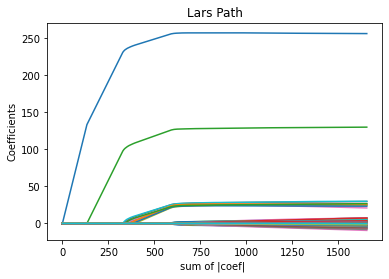

In [74]:
lars_model = skl.linear_model.Lars(n_nonzero_coefs=500)
lars_model.fit(x_train, y_train)

model_coeff_path = lars_model.coef_path_
coeff_sum = np.sum(abs(model_coeff_path), axis=0)

#sklearn
xx =  np.sum(abs(model_coeff_path.T), axis=1) #np.sum(np.abs(coefs.T), axis=1)
#xx /= xx[-1]

plt.plot(xx, model_coeff_path.T)

#plt.plot(coeff_sum, model_coeff_path.T)
plt.xlabel("sum of |coef| ")
plt.ylabel("Coefficients")
plt.title("Lars Path")

In [75]:
prediction = lars_model.predict(x_test)
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")

r2 Score of test set : 0.9526910403725557


In [76]:
mse = skl.metrics.mean_squared_error(y_test, prediction)
print("Mean squared", mse)

Mean squared 6.294035375766058


In [77]:
print(f"no. of coeffs : {len(lars_model.active_)}")
print(f"no. of coeffs :  {len(lars_model.coef_)}")
print("No. of alphas ",  {len(lars_model.alphas_)})

filter_arr = lars_model.coef_>0
newarr = lars_model.coef_[filter_arr]
print(f"no. of non-zero coeffs : {len(newarr)}")

no. of coeffs : 450
no. of coeffs :  500
No. of alphas  {501}
no. of non-zero coeffs : 225


In [88]:
lars_model.alphas_

array([4.00768120e-01, 2.01696867e-01, 4.68283393e-02, 4.36189945e-02,
       4.09044719e-02, 3.84852791e-02, 3.72421910e-02, 3.49670310e-02,
       3.36178272e-02, 3.15511669e-02, 2.96623836e-02, 5.71166264e-03,
       5.42277379e-03, 4.82644004e-03, 4.42360424e-03, 4.37108062e-03,
       4.28590870e-03, 3.86430278e-03, 3.84925841e-03, 3.84038240e-03,
       3.63230535e-03, 3.54066323e-03, 3.42000787e-03, 3.30706179e-03,
       3.28739273e-03, 3.27741826e-03, 3.24442158e-03, 3.22054305e-03,
       3.21705390e-03, 3.18032921e-03, 3.16136541e-03, 3.01313326e-03,
       2.92883279e-03, 2.89309965e-03, 2.84795293e-03, 2.82445024e-03,
       2.77774049e-03, 2.77388751e-03, 2.77028634e-03, 2.74605887e-03,
       2.71768004e-03, 2.71010195e-03, 2.69330418e-03, 2.64872041e-03,
       2.63306361e-03, 2.62051210e-03, 2.61464382e-03, 2.59923410e-03,
       2.58821240e-03, 2.57183151e-03, 2.56390142e-03, 2.55453741e-03,
       2.51003225e-03, 2.47205355e-03, 2.46235143e-03, 2.46096396e-03,
      

In [91]:
lars_model.coef_

array([ 9.88911604e+00,  0.00000000e+00,  5.01897149e+00,  0.00000000e+00,
        9.76485569e-01,  1.12633874e+00,  7.76500605e-01,  9.00199724e-01,
        9.98949475e-01,  1.14634685e+00,  9.07806605e-01,  9.36837729e-01,
        1.04301986e+00, -5.88743976e-02,  2.86887344e-02,  5.60030008e-02,
       -5.98394989e-02,  1.34784994e-01,  0.00000000e+00, -7.57471119e-02,
        1.07737073e-01,  0.00000000e+00,  2.59862098e-02, -1.27050127e-01,
       -5.49117636e-02,  8.06277495e-03, -1.77942581e-01, -1.78546485e-02,
        1.32976057e-01,  6.63091108e-02, -4.30511013e-03,  1.44418662e-01,
       -2.32625965e-01,  0.00000000e+00, -9.80106538e-02,  0.00000000e+00,
       -1.72256603e-01, -2.93704009e-02,  5.69973291e-02, -1.29163623e-01,
        9.56729765e-02, -3.96108380e-02,  0.00000000e+00, -1.48132855e-03,
       -1.42782728e-01, -5.14682211e-02, -2.19627115e-02,  1.05296432e-01,
       -5.19690614e-02, -1.61173080e-02, -1.48498305e-01, -1.97387053e-01,
        2.75381500e-01,  

LARS Cross validation model gives lambda = 0.00289.
This is a very low value and shows that the model is close to a linear regression model.

.

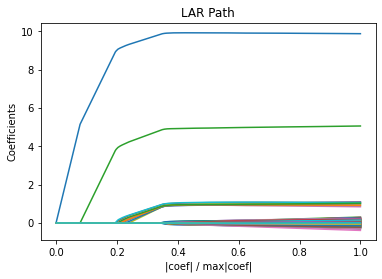

In [78]:
#skl.linear_model.lars_path(x_train.to_numpy(), y_train.to_numpy())
alphas, actives, coefs = linear_model.lars_path(x_train.to_numpy(), y_train.to_numpy(), method="lar", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LAR Path")
plt.show()

## LARS Lasso

In [79]:
larsLasso_cv_model = skl.linear_model.LassoLarsCV()
larsLasso_cv_model.fit(x_train, y_train)
print(f"alpha/ lambda value : {larsLasso_cv_model.alpha_}")

alpha/ lambda value : 0.002966436024966447


In [80]:
print(len(larsLasso_cv_model.coef_))
filter_arr = larsLasso_cv_model.coef_>0
newarr = larsLasso_cv_model.coef_[filter_arr]
print(f"no. of non-zero coeffs : {len(newarr)}")

500
no. of non-zero coeffs : 21


Text(0.5, 1.0, 'lasso lars')

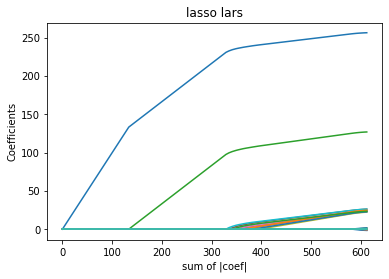

In [81]:
#Lasso lars model
lassoLarsModel = LassoLars(alpha = larsLasso_cv_model.alpha_)
lassoLarsModel.fit(x_train, y_train)

model_coeff_path = lassoLarsModel.coef_path_
coeff_sum = np.sum(abs(model_coeff_path), axis=0)

#sklearn
xx =  np.sum(abs(model_coeff_path.T), axis=1) #np.sum(np.abs(coefs.T), axis=1)
#xx /= xx[-1]

plt.plot(xx, model_coeff_path.T)
plt.xlabel("sum of |coef|")
plt.ylabel("Coefficients")
plt.title("lasso lars")

#plt.plot(coeff_sum, model_coeff_path.T)

In [82]:
filter_arr = lassoLarsModel.coef_>0
newarr = lassoLarsModel.coef_[filter_arr]
print(f"no. of non-zero coeffs : {len(newarr)}")

no. of non-zero coeffs : 21


In [83]:
prediction = lassoLarsModel.predict(x_test)
print(f"r2 Score of test set : {r2_score(y_test, prediction)}")

r2 Score of test set : 0.9909865889014243


In [86]:
mse = skl.metrics.mean_squared_error(y_test, prediction)
print("Mean squared", mse)

Mean squared 1.199154002910006


In [93]:
lassoLarsModel.alpha

0.002966436024966447

Computing regularization path using the LARS LASSO...
.

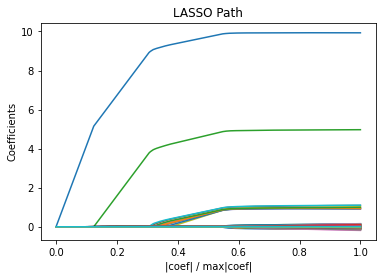

In [85]:
print("Computing regularization path using the LARS LASSO...")
_, _, coefs = linear_model.lars_path(x_train.to_numpy(), y_train.to_numpy(), method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
#plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.show()

## Lasso